<a href="https://colab.research.google.com/github/hith3sh/tricalAI/blob/main/EN3150_A03_part1_hithesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **EN3150 Assignment 03 part 01**

## Importing dependencies

In [38]:
import tensorflow as tf
import keras
from keras import layers,models,datasets, optimizers
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [8]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Visualizing some data

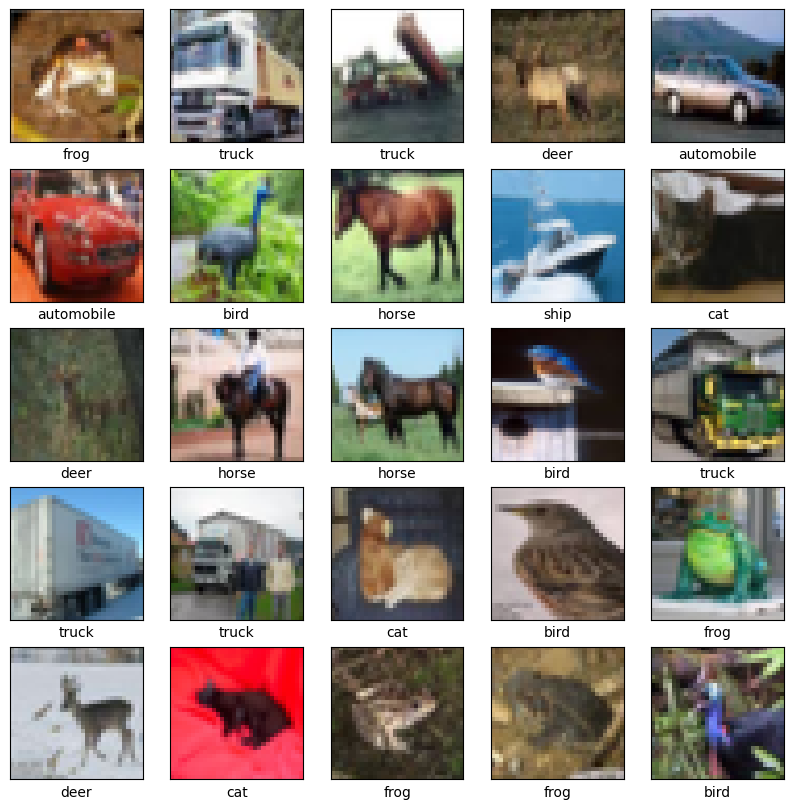

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


## Bar chart to visualize frequency of images

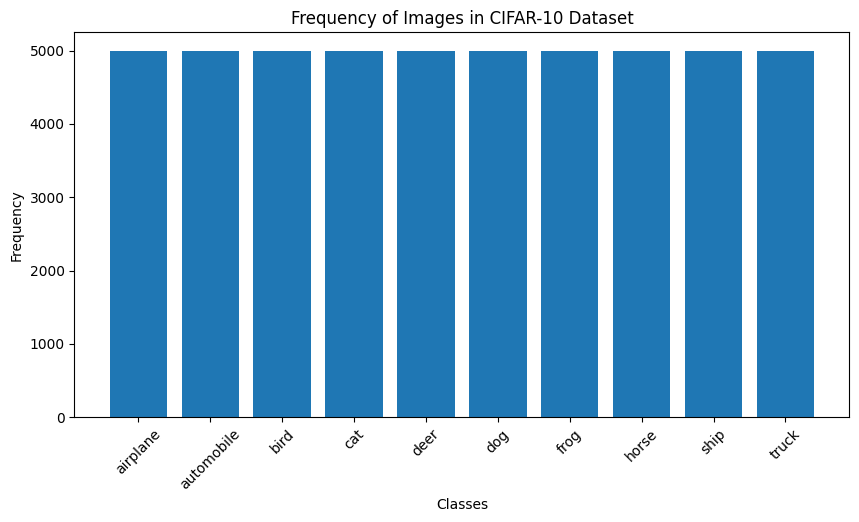

In [10]:
class_freq = np.bincount(y_train.flatten())

plt.figure(figsize=(10, 5))
plt.bar(class_names, class_freq)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Frequency of Images in CIFAR-10 Dataset')
plt.xticks(rotation=45)
plt.show()

## Normalizing

In [14]:
x_train, x_test = x_train/255.0, x_test/255.0

## Specifying the CNN model

In [16]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5)
    layers.Dense(10, activation='softmax')

])

since y values are not one hot encoded, we're using sparse categorical crossentropy

In [20]:
# default learning rate is 0.001
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Model training

In [23]:
history = model.fit(x_train, y_train, epochs =20 , batch_size = 64, validation_split =0.2)

Epoch 1/20
625/625 [==============================] - 72s 115ms/step - loss: 1.1024 - accuracy: 0.6108 - val_loss: 1.0955 - val_accuracy: 0.6124
Epoch 2/20
625/625 [==============================] - 76s 121ms/step - loss: 0.9961 - accuracy: 0.6511 - val_loss: 0.9712 - val_accuracy: 0.6627
Epoch 3/20
625/625 [==============================] - 73s 117ms/step - loss: 0.9191 - accuracy: 0.6769 - val_loss: 0.9592 - val_accuracy: 0.6635
Epoch 4/20
625/625 [==============================] - 68s 109ms/step - loss: 0.8501 - accuracy: 0.7037 - val_loss: 0.9316 - val_accuracy: 0.6755
Epoch 5/20
625/625 [==============================] - 57s 91ms/step - loss: 0.8060 - accuracy: 0.7186 - val_loss: 0.8985 - val_accuracy: 0.6858
Epoch 6/20
625/625 [==============================] - 51s 81ms/step - loss: 0.7494 - accuracy: 0.7397 - val_loss: 0.9200 - val_accuracy: 0.6799
Epoch 7/20
625/625 [==============================] - 57s 92ms/step - loss: 0.7171 - accuracy: 0.7502 - val_loss: 0.8615 - val_accur

## loss and accuracy chart

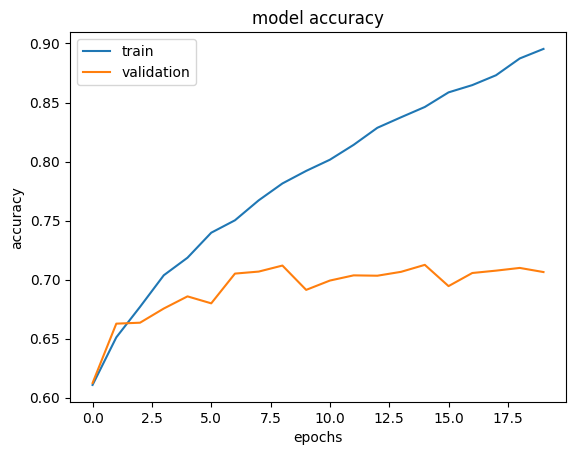

In [24]:
# accuracy chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

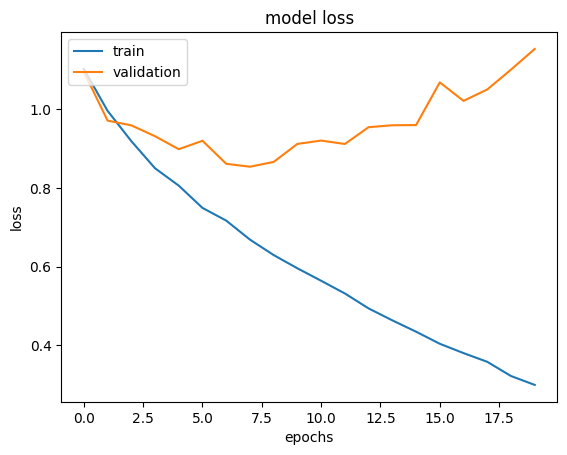

In [25]:
#loss chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

## Model performance on unseen test data

In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 4s 11ms/step - loss: 1.1891 - accuracy: 0.7011
Test accuracy: 0.7010999917984009


now that the model is trained, we do inference using model.predict()

## confusion matrix

In [27]:
y_pred  =model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 4s 12ms/step


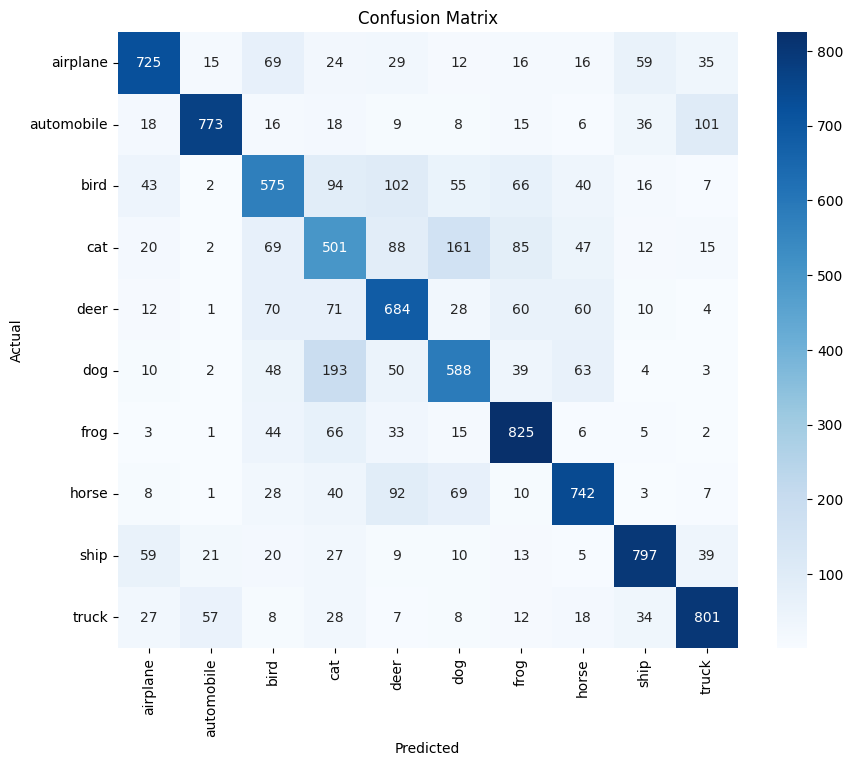

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## precision and recall

In [33]:
from sklearn.metrics import precision_score, recall_score
#since we're doing multi class classification 'weighted' is used
precision = precision_score(y_test, y_pred_classes, average= 'weighted')
recall = recall_score(y_test, y_pred_classes, average= 'weighted')
print(f'precision :{precision}')
print(f'recall :{recall}')

precision :0.7051993268948082
recall :0.7011


## training & validation loss for different learning rates

lr = [0.1, 0.01, 0.001, 0.0001]

In [40]:
train_losses = []
val_losses = []
#since we already calculated for lr = 0.001
train_loss_for_lr_001 = history.history['loss']
val_loss_for_lr_001 = history.history['val_loss']

In [41]:
# for learning rate 0.1
model.compile(optimizer= optimizers.Adam(learning_rate=0.1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
train_losses.append(history.history['loss'])
val_losses.append(history.history['val_loss'])

Epoch 1/20
625/625 [==============================] - 69s 109ms/step - loss: 22.8778 - accuracy: 0.0995 - val_loss: 2.3089 - val_accuracy: 0.0997
Epoch 2/20
625/625 [==============================] - 66s 106ms/step - loss: 2.3109 - accuracy: 0.1005 - val_loss: 2.3112 - val_accuracy: 0.1025
Epoch 3/20
625/625 [==============================] - 60s 96ms/step - loss: 2.3105 - accuracy: 0.1003 - val_loss: 2.3111 - val_accuracy: 0.1003
Epoch 4/20
625/625 [==============================] - 50s 80ms/step - loss: 2.3119 - accuracy: 0.0987 - val_loss: 2.3076 - val_accuracy: 0.1022
Epoch 5/20
625/625 [==============================] - 49s 79ms/step - loss: 2.3120 - accuracy: 0.0993 - val_loss: 2.3085 - val_accuracy: 0.1003
Epoch 6/20
625/625 [==============================] - 49s 78ms/step - loss: 2.3117 - accuracy: 0.0995 - val_loss: 2.3081 - val_accuracy: 0.1003
Epoch 7/20
625/625 [==============================] - 47s 75ms/step - loss: 2.3123 - accuracy: 0.1013 - val_loss: 2.3186 - val_accura

In [42]:
# for learning rate 0.01
#since we already calculated that value , we can just append to the list
train_losses.append(train_loss_for_lr_001)
val_losses.append(val_loss_for_lr_001)

In [43]:
# for learning rate 0.001
model.compile(optimizer= optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
train_losses.append(history.history['loss'])
val_losses.append(history.history['val_loss'])

Epoch 1/20
625/625 [==============================] - 50s 78ms/step - loss: 2.3051 - accuracy: 0.0999 - val_loss: 2.3037 - val_accuracy: 0.0980
Epoch 2/20
625/625 [==============================] - 50s 80ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3029 - val_accuracy: 0.0952
Epoch 3/20
625/625 [==============================] - 55s 88ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 4/20
625/625 [==============================] - 48s 77ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3028 - val_accuracy: 0.0977
Epoch 5/20
625/625 [==============================] - 49s 78ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 6/20
625/625 [==============================] - 49s 78ms/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 7/20
625/625 [==============================] - 49s 78ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy:

In [44]:
# for learning rate 0.0001
model.compile(optimizer= optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
train_losses.append(history.history['loss'])
val_losses.append(history.history['val_loss'])

Epoch 1/20
625/625 [==============================] - 52s 81ms/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0977
Epoch 2/20
625/625 [==============================] - 56s 90ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0977
Epoch 3/20
625/625 [==============================] - 51s 81ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 4/20
625/625 [==============================] - 53s 84ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/20
625/625 [==============================] - 54s 86ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/20
625/625 [==============================] - 67s 107ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/20
625/625 [==============================] - 51s 82ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy

## visualize for different learning rates

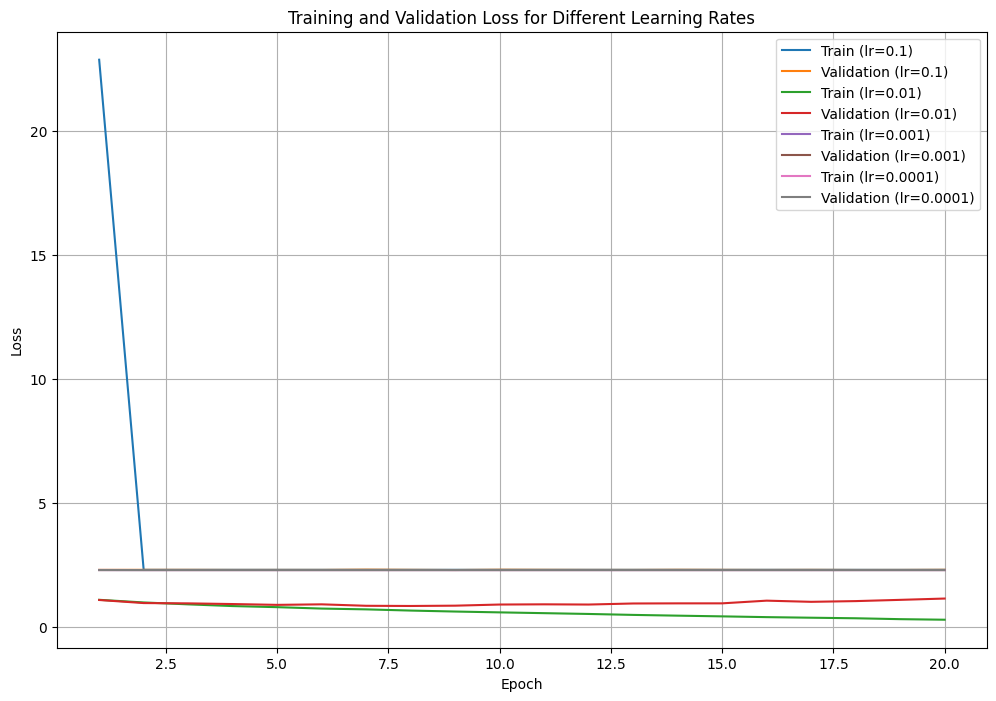

In [47]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(range(1, 21), train_losses[i], label=f'Train (lr={lr})')
    plt.plot(range(1, 21), val_losses[i], label=f'Validation (lr={lr})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()